In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


### IMPORTING LIB
* `numpy` for numerical calculations 
* `Pandas` for handling data 
* `Matplotlib` for visualisation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### READING DATASET FROM THE `.CSV` FILE

In [3]:
train=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
sample=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")

* Removing those columns which has missing values.
* Here We use `axis=1` for columns if we want `drop` rows we have use `axis=0`.
* **dropna()**- Drops those columns or rows which has missing values

In [4]:
train=train.dropna(axis=1)
test=test.dropna(axis=1)

In [5]:
train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [6]:
test

,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
0,1461,20,11622,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,...,140,0,0,0,120,0,0,6,2010,Normal
1,1462,20,14267,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,...,393,36,0,0,0,0,12500,6,2010,Normal
2,1463,60,13830,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,212,34,0,0,0,0,0,3,2010,Normal
3,1464,60,9978,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,360,36,0,0,0,0,0,6,2010,Normal
4,1465,120,5005,Pave,IR1,HLS,Inside,Gtl,StoneBr,Norm,...,0,82,0,0,144,0,0,1,2010,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1936,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,0,0,0,0,0,0,0,6,2006,Normal
1455,2916,160,1894,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,...,0,24,0,0,0,0,0,4,2006,Abnorml
1456,2917,20,20000,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,474,0,0,0,0,0,0,9,2006,Abnorml
1457,2918,85,10441,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,80,32,0,0,0,0,700,7,2006,Normal


For training and testing the model. The number of cols in training and testing must be same.

In [7]:
remaining_col=list(set(train.columns)-set(test.columns))
remaining_col

['GarageArea',
 'MSZoning',
 'Functional',
 'Exterior2nd',
 'BsmtFullBath',
 'Utilities',
 'GarageCars',
 'BsmtHalfBath',
 'KitchenQual',
 'BsmtFinSF1',
 'SalePrice',
 'BsmtUnfSF',
 'Exterior1st',
 'BsmtFinSF2',
 'SaleType',
 'TotalBsmtSF']

* Removing `SalePrice` as it is output variable.
* It means this column we have to predict.

In [8]:
remaining_col.remove('SalePrice')

In [9]:
remaining_col

['GarageArea',
 'MSZoning',
 'Functional',
 'Exterior2nd',
 'BsmtFullBath',
 'Utilities',
 'GarageCars',
 'BsmtHalfBath',
 'KitchenQual',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'Exterior1st',
 'BsmtFinSF2',
 'SaleType',
 'TotalBsmtSF']

* `Drop` those columns from the training set which does not exist in test set and vice versa also be done.

In [10]:
train=train.drop(remaining_col,axis=1)

AWESOME,We have now train cols and test cols are same.

In [11]:
train.shape,test.shape

((1460, 47), (1459, 47))

In [12]:
train.columns

Index(['Id', 'MSSubClass', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond',
       'Foundation', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [13]:

test.columns

Index(['Id', 'MSSubClass', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond',
       'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleCondition'],
      dtype='object')

In [14]:
set(train.columns)-set(test.columns)

{'SalePrice'}

* SPlitting the training set into `X` and `y` as X(Independent Var) and y(dependent Variable)
* In simple,:
     * X - Input variables
     * y - Output Variables

In [15]:
y=train['SalePrice']
X=train.drop('SalePrice',axis=1)

In [16]:
X.columns

Index(['Id', 'MSSubClass', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond',
       'Foundation', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'SaleCondition'],
      dtype='object')

In [17]:
commonn_col=X[X.columns.intersection(test.columns)]
commonn_col.columns

Index(['Id', 'MSSubClass', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond',
       'Foundation', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'SaleCondition'],
      dtype='object')

In [18]:
X.shape,test.shape

((1460, 46), (1459, 47))

In [19]:
set(test.columns)-set(X.columns)

{'Electrical'}

Removing the `Electrical` column from the test set as it is not present in X.

In [20]:
test=test.drop('Electrical',axis=1)

In [21]:
set(test.columns)==set(X.columns)

True

In [22]:
len(X),len(test)

(1460, 1459)

`ID` its is irrelvant column.

In [23]:
X=X.drop('Id',axis=1)
test=test.drop('Id',axis=1)

Removing those columns which has `majority value=0` which more than 75%.

In [24]:
X.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,1162.626712,346.992466,5.844521,1515.463699,...,0.613014,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,386.587738,436.528436,48.623081,525.480383,...,0.644666,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,882.000000,0.000000,0.000000,1129.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,1087.000000,0.000000,0.000000,1464.000000,...,1.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,1391.250000,728.000000,0.000000,1776.750000,...,1.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,4692.000000,2065.000000,572.000000,5642.000000,...,3.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [25]:
X=X.drop(['EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],axis=1)
test=test.drop(['EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],axis=1)

In [26]:
X.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,1162.626712,346.992466,5.844521,1515.463699,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,94.244521,46.660274,6.321918,2007.815753
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,386.587738,436.528436,48.623081,525.480383,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,125.338794,66.256028,2.703626,1.328095
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,882.000000,0.000000,0.000000,1129.500000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,1087.000000,0.000000,0.000000,1464.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,0.000000,25.000000,6.000000,2008.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,1391.250000,728.000000,0.000000,1776.750000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,168.000000,68.000000,8.000000,2009.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,857.000000,547.000000,12.000000,2010.000000


Numerical Columns which contains integer and float values.

In [27]:
numerical_col=[col for col in X.columns if X[col].dtype!='object']
numerical_col

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'WoodDeckSF',
 'OpenPorchSF',
 'MoSold',
 'YrSold']

Not contain any missing value.

In [28]:
X[numerical_col].isnull().sum()

MSSubClass      0
LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
WoodDeckSF      0
OpenPorchSF     0
MoSold          0
YrSold          0
dtype: int64

Categorical columns which has `string` value or `dtype==object` 

In [29]:
cat_col=[col for col in X.columns if X[col].dtype=='object']
cat_col

['Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'PavedDrive',
 'SaleCondition']

In [30]:
X[cat_col]

,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,PavedDrive,SaleCondition
0,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,Y,Normal
1,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,TA,TA,CBlock,GasA,Ex,Y,Y,Normal
2,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,Y,Normal
3,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,TA,TA,BrkTil,GasA,Gd,Y,Y,Abnorml
4,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,Y,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Pave,Reg,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,TA,TA,PConc,GasA,Ex,Y,Y,Normal
1456,Pave,Reg,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,TA,TA,CBlock,GasA,TA,Y,Y,Normal
1457,Pave,Reg,Lvl,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Ex,Gd,Stone,GasA,Ex,Y,Y,Normal
1458,Pave,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,TA,TA,CBlock,GasA,Gd,Y,Y,Normal


Counting values for each column of categorical columns

In [31]:
X['Street'].value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

In [32]:
X['LotShape'].value_counts(),X['LandContour'].value_counts()

(LotShape
 Reg    925
 IR1    484
 IR2     41
 IR3     10
 Name: count, dtype: int64,
 LandContour
 Lvl    1311
 Bnk      63
 HLS      50
 Low      36
 Name: count, dtype: int64)

In [33]:
X['LotConfig'].value_counts(),X['LandSlope'].value_counts()

(LotConfig
 Inside     1052
 Corner      263
 CulDSac      94
 FR2          47
 FR3           4
 Name: count, dtype: int64,
 LandSlope
 Gtl    1382
 Mod      65
 Sev      13
 Name: count, dtype: int64)

In [34]:
for i in X[cat_col].columns:
    print(X[i].value_counts())

Street
Pave    1454
Grvl       6
Name: count, dtype: int64
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64
Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64
Co

#### ORDINAL ENCODER
* It converts the catgorical columns into numerical ones by assigning  a int value to each value of cat column.

In [35]:
from sklearn.preprocessing import OrdinalEncoder

enc=OrdinalEncoder()
X[cat_col]=enc.fit_transform(X[cat_col])
test[cat_col]=enc.fit_transform(test[cat_col])

In [36]:
X[cat_col]

,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,PavedDrive,SaleCondition
0,1.0,3.0,3.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,1.0,2.0,4.0,2.0,1.0,0.0,1.0,2.0,4.0
1,1.0,3.0,3.0,2.0,0.0,24.0,1.0,2.0,0.0,2.0,1.0,1.0,3.0,4.0,1.0,1.0,0.0,1.0,2.0,4.0
2,1.0,0.0,3.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,1.0,2.0,4.0,2.0,1.0,0.0,1.0,2.0,4.0
3,1.0,0.0,3.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,1.0,1.0,3.0,4.0,0.0,1.0,2.0,1.0,2.0,0.0
4,1.0,0.0,3.0,2.0,0.0,15.0,2.0,2.0,0.0,5.0,1.0,1.0,2.0,4.0,2.0,1.0,0.0,1.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.0,3.0,3.0,4.0,0.0,8.0,2.0,2.0,0.0,5.0,1.0,1.0,3.0,4.0,2.0,1.0,0.0,1.0,2.0,4.0
1456,1.0,3.0,3.0,4.0,0.0,14.0,2.0,2.0,0.0,2.0,1.0,1.0,3.0,4.0,1.0,1.0,4.0,1.0,2.0,4.0
1457,1.0,3.0,3.0,4.0,0.0,6.0,2.0,2.0,0.0,5.0,1.0,1.0,0.0,2.0,4.0,1.0,0.0,1.0,2.0,4.0
1458,1.0,3.0,3.0,4.0,0.0,12.0,2.0,2.0,0.0,2.0,3.0,1.0,3.0,4.0,1.0,1.0,2.0,1.0,2.0,4.0


In [37]:
for i in X[cat_col].columns:
    print(X[i].value_counts())

Street
1.0    1454
0.0       6
Name: count, dtype: int64
LotShape
3.0    925
0.0    484
1.0     41
2.0     10
Name: count, dtype: int64
LandContour
3.0    1311
0.0      63
1.0      50
2.0      36
Name: count, dtype: int64
LotConfig
4.0    1052
0.0     263
1.0      94
2.0      47
3.0       4
Name: count, dtype: int64
LandSlope
0.0    1382
1.0      65
2.0      13
Name: count, dtype: int64
Neighborhood
12.0    225
5.0     150
17.0    113
7.0     100
21.0     86
8.0      79
16.0     77
19.0     74
14.0     73
20.0     59
3.0      58
6.0      51
11.0     49
15.0     41
23.0     38
9.0      37
4.0      28
22.0     25
18.0     25
10.0     17
0.0      17
2.0      16
24.0     11
13.0      9
1.0       2
Name: count, dtype: int64
Condition1
2.0    1260
1.0      81
0.0      48
6.0      26
4.0      19
5.0      11
3.0       8
8.0       5
7.0       2
Name: count, dtype: int64
Condition2
2.0    1445
1.0       6
0.0       2
7.0       2
4.0       2
3.0       1
6.0       1
5.0       1
Name: count, dtype:

In [38]:
test[cat_col]

,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,PavedDrive,SaleCondition
0,1.0,3.0,3.0,4.0,0.0,12.0,1.0,2.0,0.0,2.0,1.0,0.0,3.0,4.0,1.0,0.0,4.0,1.0,2.0,4.0
1,1.0,0.0,3.0,0.0,0.0,12.0,2.0,2.0,0.0,2.0,3.0,0.0,3.0,4.0,1.0,0.0,4.0,1.0,2.0,4.0
2,1.0,0.0,3.0,4.0,0.0,8.0,2.0,2.0,0.0,4.0,1.0,0.0,3.0,4.0,2.0,0.0,2.0,1.0,2.0,4.0
3,1.0,0.0,3.0,4.0,0.0,8.0,2.0,2.0,0.0,4.0,1.0,0.0,3.0,4.0,2.0,0.0,0.0,1.0,2.0,4.0
4,1.0,0.0,1.0,4.0,0.0,22.0,2.0,2.0,4.0,2.0,1.0,0.0,2.0,4.0,2.0,0.0,0.0,1.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1.0,3.0,3.0,4.0,0.0,10.0,2.0,2.0,3.0,4.0,1.0,0.0,3.0,4.0,1.0,0.0,2.0,1.0,2.0,4.0
1455,1.0,3.0,3.0,4.0,0.0,10.0,2.0,2.0,4.0,4.0,1.0,0.0,3.0,4.0,1.0,0.0,4.0,1.0,2.0,0.0
1456,1.0,3.0,3.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,1.0,0.0,3.0,4.0,1.0,0.0,0.0,1.0,2.0,0.0
1457,1.0,3.0,3.0,4.0,0.0,11.0,2.0,2.0,0.0,5.0,1.0,0.0,3.0,4.0,2.0,0.0,4.0,1.0,2.0,4.0


#### Normalisation
* It is process in which we normalise the numerical values in the range of 0 to 1.
* Improves Convergence in Gradient Descent:
    1. `Gradient Descent` optimization converges faster with normalised data because it ensures that all features contribute equally to the loss function.
* Improves Interpretability:
    1. `Normalised` data makes it easier to interpret the coeficients of `linear models`.Without normalisation, the scale of the coefficients can be misleading and hard to compute.
* Reduces Sensitivity to Initial Weights:
    1. In `Neural Networks`,normalisation reduces sensitivity to the initial weights,leading to more stable training and improved learning rates. 

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

X_scaled=enc.fit_transform(X)
test_scaled=enc.fit_transform(test)

In [40]:
X_scaled.shape,test_scaled.shape

((1460, 40), (1459, 40))

### MODEL TRAINING 

In [41]:
def model_train_func(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_valid)
    mae=mean_absolute_error(y_valid,y_pred)
    r2_sco=r2_score(y_valid,y_pred)
    print(model)
    print("MEAN ABSOLUTE ERROR:",mae)
    print("R2_SCORE:",r2_sco)

1. Linear Regression:
  * A Statistical method to model the relationship between a dependent variable and one or more independent variable.
  * y - Output Variable
  * X - Input Variable
  * W - Weight
  * B - Bias

In [42]:
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid=train_test_split(X_scaled,y,test_size=0.2,random_state=1)

In [43]:
from sklearn.metrics import mean_absolute_error,r2_score

In [44]:
from sklearn.linear_model import LinearRegression

model_1=LinearRegression()
model_train_func(model_1)

LinearRegression()
MEAN ABSOLUTE ERROR: 22683.85387037438
R2_SCORE: 0.790858681770635


### Lasso Regresion 
* **LASSO(Least Absolute Shrinkage And Selection Operator)** is a type of linear regression that performs both variable selection and regularisation.It enhances the prediction accuracy and interpreability of the statistical model it produces.
* **Parameters:**
     1. **alpha**: The regularisation strength parameters.Contol the degree of shrinkage applied to the coefficents.Higher values of alpha result in stronger regularisation and can shrink some coefficients to ZERO,effectively performing variable selection.
     2. **fit_intercept**: A boolean parameter (T or F).Indicates whether to calculate the intercept for this model.If False,no intercept will be used in the calculations.
     3. **max_iter**: Maximum number of iterations for the optimization algorithm.Default is 1000.Incraese if the update are smaller than this value.
     4. **selection**:The method for selecting the coordinate along which to minimize the cost function.options are cyclic and random.random can be faster for large problems.

In [45]:
from sklearn.linear_model import Lasso

model_2=Lasso(alpha=100.0,fit_intercept=True,
              max_iter=1000,tol=1e-4,random_state=1,selection='random'
             )
model_train_func(model_2)

Lasso(alpha=100.0, random_state=1, selection='random')
MEAN ABSOLUTE ERROR: 22479.114929031046
R2_SCORE: 0.790944161357414


In [46]:
from sklearn.linear_model import Ridge

model_3=Ridge(random_state=1,
             max_iter=1000,
             alpha=1.0,
             fit_intercept=True,
             tol=1e-4,
             solver='sag')

model_train_func(model_3)


Ridge(max_iter=1000, random_state=1, solver='sag')
MEAN ABSOLUTE ERROR: 22649.097120098013
R2_SCORE: 0.7913477047666168


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [47]:
from sklearn.linear_model import ElasticNet

model_4=ElasticNet(random_state=1,
                  alpha=1.0,
                  l1_ratio=0.9,
                  fit_intercept=True,
                  max_iter=1000,
                  tol=1e-2,
                  selection='random')

model_train_func(model_4)

ElasticNet(l1_ratio=0.9, random_state=1, selection='random', tol=0.01)
MEAN ABSOLUTE ERROR: 22259.040621695913
R2_SCORE: 0.7954292165342634


For above apply algorithm, I have concluded that the data we have  limited but it has lots of features and model is did not able to distingusih between the correct feature or relevant features.We have to reduce the **feature selection** or **Feature Extraction**.

#### Correlation Matrix 
It tells us about a feature is related to the output variable.

In [48]:
#Calculate correlations coefficents with the target variable 
correlations=np.abs(np.corrcoef(X_train.T,y_train))

#Get correlation coefficents for each feature
correlation_with_target=correlations[:-1,-1] #Remove row

#Rank features based on correlation coeffiencts 
feature_indices=np.argsort(correlation_with_target)[::-1]
sorted_correlations=correlation_with_target[feature_indices]

#Select topk features based on correlation coefficents 
k=35
selected_features=feature_indices[:k]

In [49]:
selected_features

array([12, 27, 18, 24, 28, 32, 14, 15,  1, 33, 22, 20, 25, 36, 35, 29,  3,
       23, 39, 16, 34,  7, 30, 11, 31, 17, 19, 21,  8, 13, 10,  6,  0,  5,
        2])

In [50]:
X_train_filter=X_train[:,selected_features]
X_valid_filter=X_valid[:,selected_features]

In [51]:
def model_train(model,X_train,X_valid,y_train,y_valid):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_valid)
    mae=mean_absolute_error(y_valid,y_pred)
    r2_sco=r2_score(y_valid,y_pred)
    print(model)
    print("MEAN ABSOLUTE ERROR:",mae)
    print("R2_SCORE:",r2_sco)

In [52]:
model_train(model_4,X_train_filter,X_valid_filter,y_train,y_valid)

ElasticNet(l1_ratio=0.9, random_state=1, selection='random', tol=0.01)
MEAN ABSOLUTE ERROR: 22227.612107335044
R2_SCORE: 0.7946612120839043


According to `correlation matrix` method we rank the features and we have found that with `35 features` of 40 we get mae upto `22227`

In [53]:
from sklearn.feature_selection import RFE

#Initilise RFE and select top 5features 
rfe=RFE(estimator=model_4,n_features_to_select=35
        ,step=1)

#Fit RFE to the dataset
rfe.fit(X,y)

#Selected Features
selected_feature=X.columns[rfe.support_]
print("Selected Features:",selected_features)

Selected Features: [12 27 18 24 28 32 14 15  1 33 22 20 25 36 35 29  3 23 39 16 34  7 30 11
 31 17 19 21  8 13 10  6  0  5  2]


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.856e+11, tolerance: 9.208e+10
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.068e+11, tolerance: 9.208e+10
  model = cd_fast.enet_coordinate_descent(


In [54]:
#Transform training and validing data to include only selected features
X_train_rfe=rfe.transform(X_train)
X_valid_rfe=rfe.transform(X_valid)

model_train(model_1,X_train_rfe,X_valid_rfe,y_train,y_valid)

LinearRegression()
MEAN ABSOLUTE ERROR: 23147.642858536823
R2_SCORE: 0.7908720926664317


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(


`Feature extraction` transforms the original features into a new set of features that often capture the essential info more effectively.Techniques like `PCA` reduce the dim of the data by projecting space while aspects of the data.

#### MUTUAL INFORMATION
* Mutual Information (MI) is a measure from information theory that quantifies the amount of `information` obtained about one random variable through another random variable.
* n the context of feature selection for machine learning, mutual information can be used to measure the dependency between each `feature` and the `target` variable.
*  The` higher `the mutual information, the more the `feature contributes` to predicting the target variable.
    1. **High MI**: A high mutual information value indicates that knowing the value of one variable provides significant information about the value of the other variable. This suggests a strong dependency between the variables.
    2. **Low MI**: A low mutual information value suggests little to no dependency between the variables, indicating that one variable does not provide much information about the other

In [55]:
from sklearn.feature_selection import mutual_info_regression

#Calulates mutual info between each feature and the target variable
mi_scores=mutual_info_regression(X,y)

#Create a Dataframe to display the MI Scores
mi_scores_data=pd.DataFrame({
    'Features':X.columns,
    'MI Scores':mi_scores
})

#Sort the dataframe by 'MI Scores' in descening order
mi_scores_data=mi_scores_data.sort_values(by='MI Scores',ascending=False)

#Display the MI Scores
print(mi_scores_data)

         Features  MI Scores
12    OverallQual   0.574013
7    Neighborhood   0.505081
27      GrLivArea   0.480448
14      YearBuilt   0.360299
18      ExterQual   0.322401
24       1stFlrSF   0.308934
0      MSSubClass   0.278451
28       FullBath   0.275016
15   YearRemodAdd   0.250100
32   TotRmsAbvGrd   0.218236
20     Foundation   0.202951
25       2ndFlrSF   0.197961
33     Fireplaces   0.171899
22      HeatingQC   0.160520
1         LotArea   0.158312
36    OpenPorchSF   0.151613
13    OverallCond   0.131947
35     WoodDeckSF   0.098221
3        LotShape   0.089158
29       HalfBath   0.081766
11     HouseStyle   0.081747
39  SaleCondition   0.076544
30   BedroomAbvGr   0.063192
10       BldgType   0.051261
23     CentralAir   0.051176
34     PavedDrive   0.049783
4     LandContour   0.029201
31   KitchenAbvGr   0.023576
19      ExterCond   0.019202
8      Condition1   0.017590
21        Heating   0.016598
2          Street   0.014846
16      RoofStyle   0.012190
38         YrS

In [56]:
mi_scores_data.columns

Index(['Features', 'MI Scores'], dtype='object')

In [57]:
#Inintailse lists to store results
thresholds=np.linspace(0,max(mi_scores),50) #50 thresholds between 0 and max mi scores
mae_list=[]

#Interate over thresholds
for threshold in thresholds:
    #Select features with MI Scores above the threshold
    selected_features=mi_scores_data[mi_scores_data['MI Scores']>threshold]['Features']
    if selected_features.empty:
        continue
    X_selected=X[selected_features]
    
    #Split the data into training and testing sets
    X_train_select,X_valid_select,y_train_select,y_valid_select=train_test_split(X_selected,y,test_size=0.2,random_state=1)
    
    #Train the model 
    model_1.fit(X_train_select,y_train_select)
    
    #Predict and calculate MAE
    y_pred=model_1.predict(X_valid_select)
    mae=mean_absolute_error(y_valid_select,y_pred)
    mae_list.append(mae)

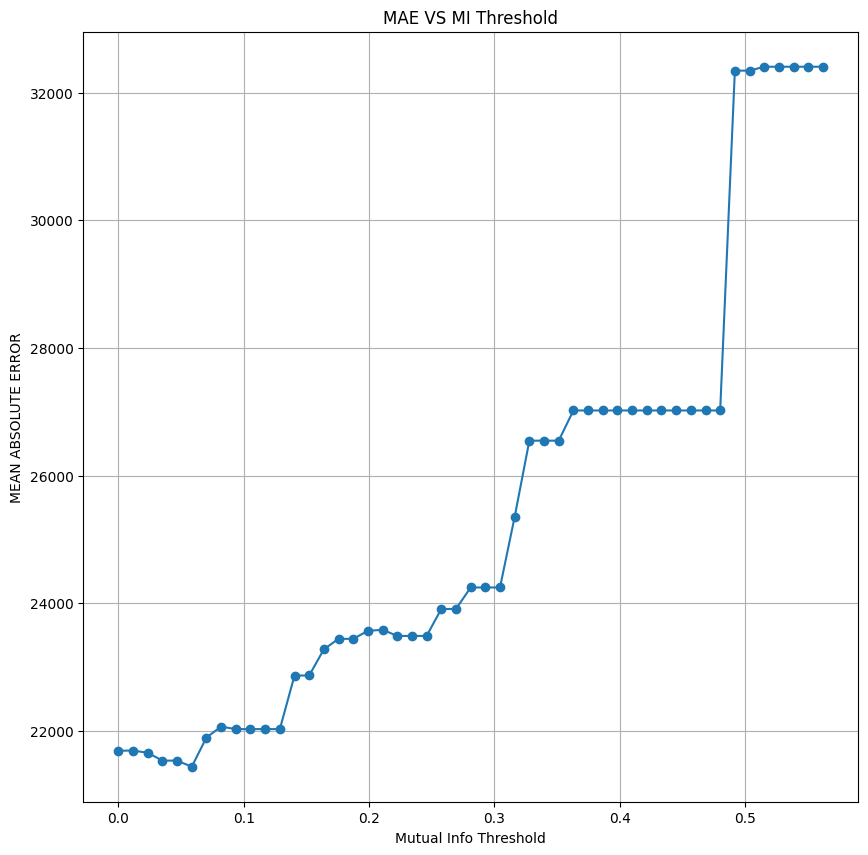

In [58]:
#PLot the MAE against the thresholds
plt.figure(figsize=(10,10))
plt.plot(thresholds[:len(mae_list)],mae_list,marker='o')
plt.xlabel("Mutual Info Threshold")
plt.ylabel("MEAN ABSOLUTE ERROR")
plt.title("MAE VS MI Threshold")
plt.grid(True)
plt.show()

As from the above, Mutual info threshold `increase`s means the number of features `deacreases` and MAE `increases`.

In [59]:
drop_irrelavant_cols=['Condition2','LowQualFinSF','MoSold']
X=X.drop(drop_irrelavant_cols,axis=1)

In [60]:
X=X.drop(['YrSold'],axis=1)

In [61]:
X=X.drop(['Street','RoofStyle','RoofMatl'],axis=1)
test=test.drop(['Street','RoofStyle','RoofMatl','YrSold','Condition2','LowQualFinSF','MoSold'],axis=1)

In [62]:
X.shape,test.shape

((1460, 33), (1459, 33))

#### MUTUAL INFO VS CORR MATRIX
* `MI capture` both `linear` and `non-linear` relationships and handle `complex` dependency.
* `Corr mat` handles `only linear` relationshps and `not` capture `complex` dependecies.

#### Polynomial features 
* Polynomial Features are created by raising existing features to different powers by multiplying features together.
* This process allows models to capture `non-linear` relationships between the features and the target variable, which can improve the model's performance if the underlying relationships is non-linear.
* `Capture non-linear rela`
* `Flexibility`: They increase the flexibility of the model,allowing it to fit more complex patterns.
* `Overfitting`: Adding too many poly features can lead to overfitting especially if the degree is high and dataset is small.
* `Computational Complexity` and `memory usage`.

In [63]:
from sklearn.preprocessing import PolynomialFeatures

#Creata a poly features with deg =2
poly=PolynomialFeatures(degree=2,include_bias=False)

X_poly=poly.fit_transform(X)
test_poly=poly.fit_transform(test)

In [64]:
X_train_poly,X_valid_poly,y_train_poly,y_valid_poly=train_test_split(X_poly,y,test_size=0.2,random_state=1)

In [65]:
model_train(model_1,X_train_poly,X_valid_poly,y_train_poly,y_valid_poly)

LinearRegression()
MEAN ABSOLUTE ERROR: 6810581.197261204
R2_SCORE: -398500.1604021323


WORST PERFORMING!!! 
* Overfitting: Poor Generalisation
* SEVERE OVERFITTING ISSUES

#### MULTI-COLLINEARITY
* Multicollinearity occurs when there are `strong correlations` between `independent variables(predictors)` in a regression model.
* It does not involve in the relationship between `predictors` and `dependent` variable(target),but rather focus on the relationships between predictors themselves.
* A `+ve` relation between 2 predictors could result in unexpected `-ve` coefficients if they are `highly` correlated with each other.
> VARIANCE INFLATION FACTOR(VIF)
VIF measures how much the variance of a reg coefficient is inflated due to multicollinearity with other predictors. A VIF value greator than 10 is often considered problematic.

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Calulcate the VIF for each predictor
vif=pd.DataFrame()
vif['Feature']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

print(vif[vif['VIF']<10])
print(len(vif[vif['VIF']<10]))

         Feature       VIF
1        LotArea  3.176893
2       LotShape  3.508095
4      LotConfig  4.899805
5      LandSlope  1.572304
6   Neighborhood  5.621429
7     Condition1  6.906769
8       BldgType  4.846777
9     HouseStyle  6.650108
16    Foundation  7.754916
18     HeatingQC  2.553963
24      HalfBath  3.250491
28    Fireplaces  2.902384
30    WoodDeckSF  1.803165
31   OpenPorchSF  1.819039
14


In [67]:
X_multi=X[vif[vif['VIF']<10]['Feature']]
test_multi=test[vif[vif['VIF']<10]['Feature']]

In [68]:
X_train_multi,X_valid_multi,y_train_multi,y_valid_multi=train_test_split(X_multi,y,
                                                                         test_size=0.2,
                                                                         random_state=1)

model_train(model_1,X_train_multi,X_valid_multi,y_train_multi,y_valid_multi)

LinearRegression()
MEAN ABSOLUTE ERROR: 37763.51117219965
R2_SCORE: 0.5327443941322552


In [69]:
model_train(model_1,X_train,X_valid,y_train,y_valid)

LinearRegression()
MEAN ABSOLUTE ERROR: 22683.85387037438
R2_SCORE: 0.790858681770635


In [70]:
X_train_mi,X_valid_mi,y_train_mi,y_valid_mi=train_test_split(X,y,
                                                 test_size=0.2,
                                                 random_state=1)

model_train(model_1,X_train_mi,X_valid_mi,y_train_mi,y_valid_mi)

LinearRegression()
MEAN ABSOLUTE ERROR: 21740.365461057012
R2_SCORE: 0.8162577936847113


In [73]:
model_train(model_2,X_train_mi,X_valid_mi,y_train_mi,y_valid_mi)

Lasso(alpha=100.0, random_state=1, selection='random')
MEAN ABSOLUTE ERROR: 21410.693011759933
R2_SCORE: 0.8198799269569621


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.841e+11, tolerance: 7.116e+08
  model = cd_fast.enet_coordinate_descent(


In [74]:
model_train(model_3,X_train_mi,X_valid_mi,y_train_mi,y_valid_mi)

Ridge(max_iter=1000, random_state=1, solver='sag')
MEAN ABSOLUTE ERROR: 33574.358774752465
R2_SCORE: 0.6629899575468308


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [75]:
model_train(model_4,X_train_mi,X_valid_mi,y_train_mi,y_valid_mi)

ElasticNet(l1_ratio=0.9, random_state=1, selection='random', tol=0.01)
MEAN ABSOLUTE ERROR: 20958.228703988563
R2_SCORE: 0.8274245341309167


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.556e+11, tolerance: 7.116e+10
  model = cd_fast.enet_coordinate_descent(


In [103]:
from sklearn.tree import DecisionTreeRegressor

model_5=DecisionTreeRegressor(random_state=1,
                             criterion='absolute_error',
                             max_depth=7)
model_train(model_5,X_train_mi,X_valid_mi,y_train_mi,y_valid_mi)

DecisionTreeRegressor(criterion='absolute_error', max_depth=7, random_state=1)
MEAN ABSOLUTE ERROR: 24772.31678082192
R2_SCORE: 0.8012303994584489


In [91]:
#Define a range of max depth values to explore
max_depth_values=range(1,21)

#Initialise lists to store max depths and corresponding MAE
depth_list=[]
mae_list=[]

#Interate over each max_depth value
for max_depth in max_depth_values:
    model_tree=DecisionTreeRegressor(random_state=1,
                                    max_depth=max_depth,
                                    criterion="absolute_error")
    model_tree.fit(X_train_mi,y_train_mi)
    y_pred_tree=model_tree.predict(X_valid_mi)
    
    mae_tree=mean_absolute_error(y_valid_mi,y_pred_tree)
    
    depth_list.append(max_depth)
    mae_list.append(mae_tree)

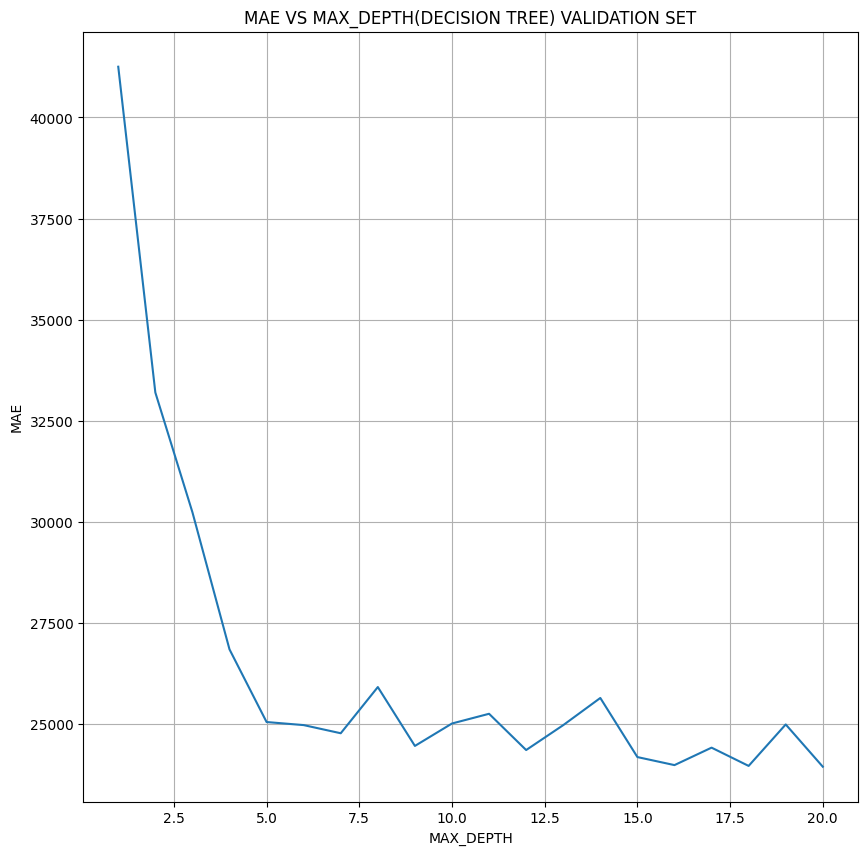

In [93]:
#Plotting the curve
plt.figure(figsize=(10,10))
plt.plot(depth_list,mae_list)
plt.title("MAE VS MAX_DEPTH(DECISION TREE) VALIDATION SET")
plt.ylabel("MAE")
plt.xlabel('MAX_DEPTH')
plt.grid(True)
plt.show()

In [131]:
from sklearn.ensemble import RandomForestRegressor

model_6=RandomForestRegressor(random_state=1,
                             max_features=None)
model_train(model_6,X_train_mi,X_valid_mi,y_train_mi,y_valid_mi)

RandomForestRegressor(max_features=None, random_state=1)
MEAN ABSOLUTE ERROR: 16525.63172374429
R2_SCORE: 0.915546959252647


In [120]:
depth_list_1=[]
mae_list_1=[]

max_depth=range(1,50,5)

for i in max_depth:
    model_ensemble=RandomForestRegressor(random_state=1,
                                       max_depth=i)
    model_ensemble.fit(X_train_mi,y_train_mi)
    y_pred_ensemble=model_ensemble.predict(X_valid_mi)
    mae_ensemble=mean_absolute_error(y_valid_mi,y_pred_ensemble)
    
    mae_list_1.append(mae_ensemble)
    depth_list_1.append(i)

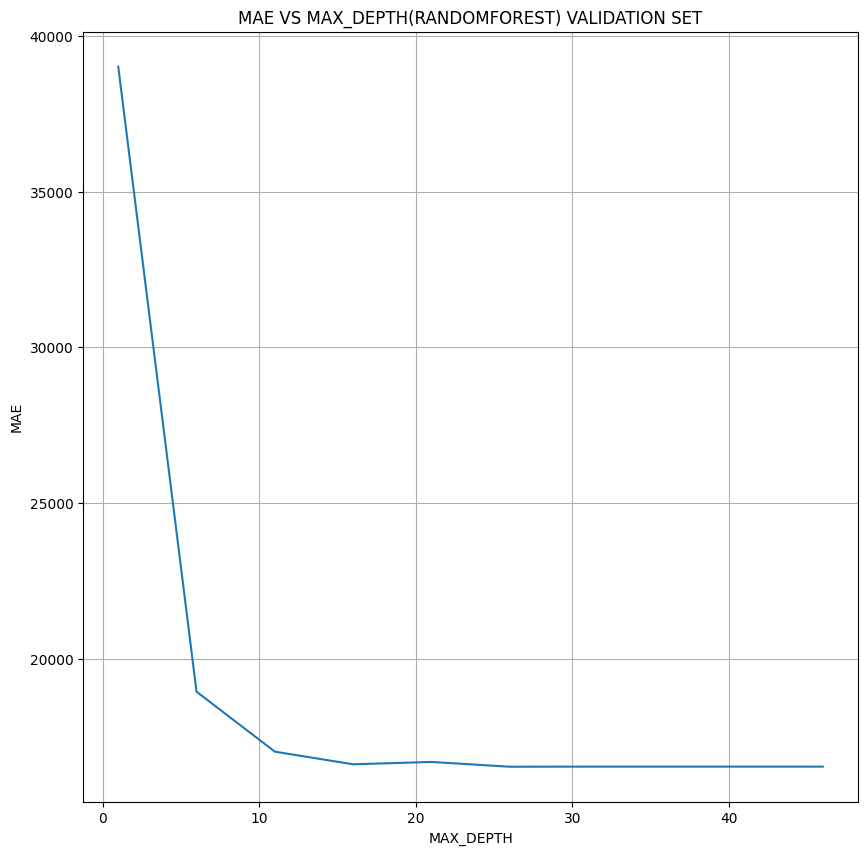

In [121]:
plt.figure(figsize=(10,10))
plt.plot(depth_list_1,mae_list_1)
plt.title("MAE VS MAX_DEPTH(RANDOMFOREST) VALIDATION SET")
plt.xlabel("MAX_DEPTH")
plt.ylabel("MAE")
plt.grid(True)
plt.show()

In [135]:
sample['SalePrice']=model_6.predict(test)
sample.to_csv('submission_rf_mi.csv',index=False)

((1460, 33), (1459, 33))